<a href="https://colab.research.google.com/github/Janeth172/EDP1/blob/main/CAMACHO%20SALVADOR-Minimos_Cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MÉTODO DE MÍNIMOS CUADRADOS**


In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Considere el problema de valor inicial
$$u'' + u = x
$$
con condiciones $u(0)=0 \text{ y } u'(0)=2 $ del Ejercicio 5.1.

Nuevamente encuentre una solución aproximada de la forma
$$
u_N = \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \alpha_3 x^3 + \cdots
$$
pero ahora use el método de mínimos cuadrados para encontrar una solución aproximada.
Compare esta solución con la del Ejercicio 5.1.

**Solución analítica**

In [2]:
x, a, b = sp.symbols('x a b')
u = sp.Function('u')

In [3]:
ode = u(x).diff(x, 2) + u(x) - x
ode
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [4]:
sol = sp.dsolve(ode, ics={u(0): 0, u(x).diff(x).subs(x, 0): 2})
sol

Eq(u(x), x + sin(x))

In [5]:
u_expr = sol.rhs
u_expr

u_num = sp.lambdify(x, u_expr, "numpy")

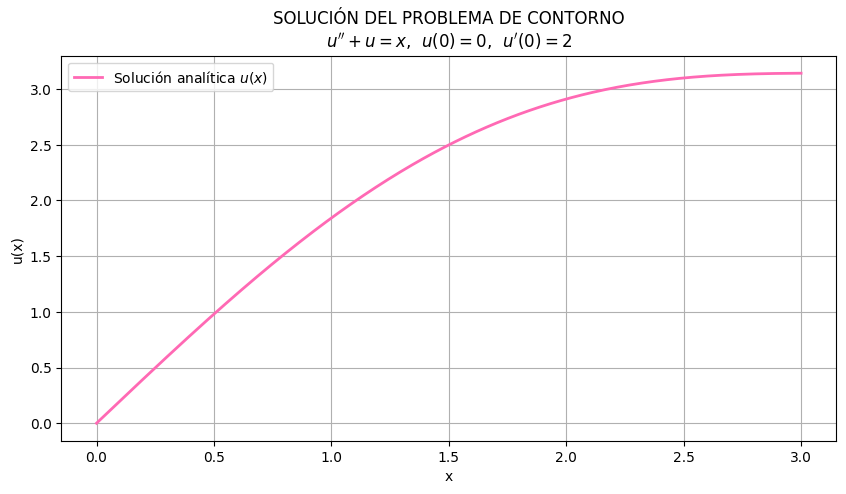

In [22]:
xx = np.linspace(0, 3, 400)
yy = u_num(xx)

plt.figure(figsize=(10,5))
plt.plot(xx, yy, color='hotpink', label='Solución analítica $u(x)$', linewidth=2)
plt.title("SOLUCIÓN DEL PROBLEMA DE CONTORNO\n$u'' + u = x$,  $u(0)=0$,  $u'(0)=2$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

**Solución numérica**

In [7]:
x = sp.symbols('x')
u = sp.Function('u')

In [8]:
a, b = sp.symbols('a b')

#FUNCIÓN DE PRUEBA u_n(x) que cumple u(0)= 0 y u'(0)=0
u_n = 2*x + a*x**2 + b*x**3


In [9]:
# Segunda derivada
u_n_2 = sp.diff(u_n, x, 2)
u_n_2


2*(a + 3*b*x)

In [10]:
# Residuo del ejercicio: u'' + u = x
E = u_n_2 + u_n - x
E

a*x**2 + b*x**3 + x + 2*(a + 3*b*x)

In [11]:
E.simplify()

a*x**2 + 2*a + b*x**3 + 6*b*x + x

In [12]:
# Integral del residuo al cuadrado
I = sp.integrate(E**2, (x, 0, 1))
I

83*a**2/15 + 49*a*b/3 + 5*a/2 + 509*b**2/35 + 22*b/5 + 1/3

In [13]:
# Ecuaciones normales
dIa = sp.diff(I, a)
dIb = sp.diff(I, b)

In [14]:
print(dIa, "\n", dIb)

166*a/15 + 49*b/3 + 5/2 
 49*a/3 + 1018*b/35 + 22/5


In [15]:
# Resolver para a y b
soleq = sp.solve([dIa, dIb], [a, b], simplify=True)
soleq

{a: -1335/86789, b: -24759/173578}

In [16]:
#SUSTITUIR a Y b EN LA FUNCION DE PRUEBA
u_approx = u_n.subs(soleq)
u_approx

-24759*x**3/173578 - 1335*x**2/86789 + 2*x

In [17]:
# Convertir en función numérica
u_approx_fn = sp.lambdify(x, u_approx, 'numpy')

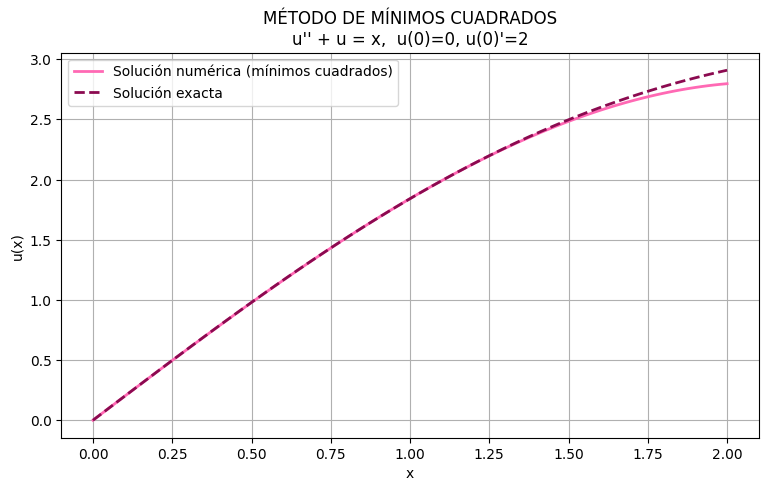

In [26]:
# SOLUCIÓN ANALÍTICA Y NUMÉRICA
xx = np.linspace(0, 2, 100)

plt.figure(figsize=(9,5))
plt.plot(xx, u_approx_fn(xx), color='hotpink', label='Solución numérica (mínimos cuadrados)', linewidth=2)
plt.plot(xx, u_num(xx), "--", color="#8B0A50", label='Solución exacta', linewidth=2)

plt.title("MÉTODO DE MÍNIMOS CUADRADOS\nu'' + u = x,  u(0)=0, u(0)'=2")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()